In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(940, 700, 3)
(800, 1500, 3)


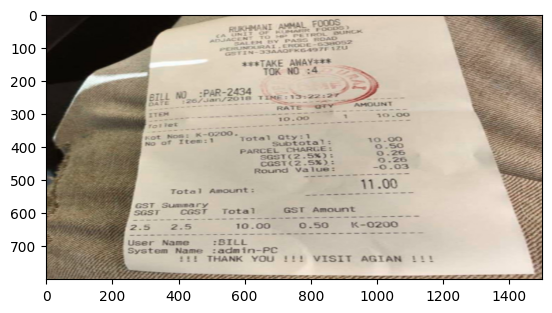

In [2]:
im_path = "./bill1.jpg"
#read image from path
img = cv2.imread(im_path)
print(img.shape)

#img resize
img = cv2.resize(img, (1500,800))

#BGR format : BGR->RGB 
print(img.shape)

plt.imshow(img)#used to see image
plt.show()#used to view image


* Remove the Noise (Blurring image)
* Edge Detection 
* Contour Extraction 
* Best Contour Selection
* Project to the screen

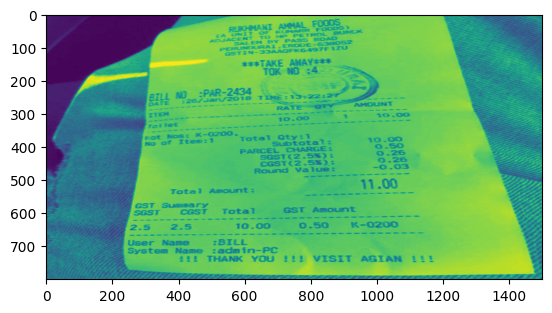

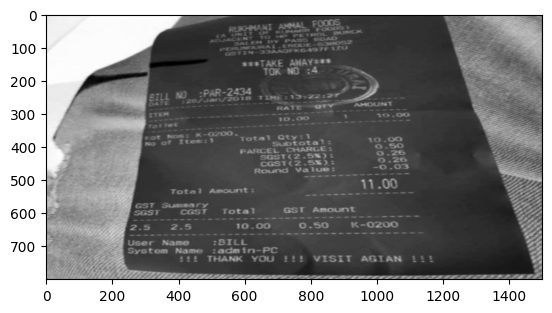

(800, 1500)


In [3]:
#Remove the noise 

#image blurring
orig = img.copy()
gray = cv2.cvtColor(orig , cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
#blurring to remove noise

blurred = cv2.GaussianBlur(gray,(5,5) , 0)
plt.imshow(blurred , cmap = 'binary')
plt.show()
print(blurred.shape)

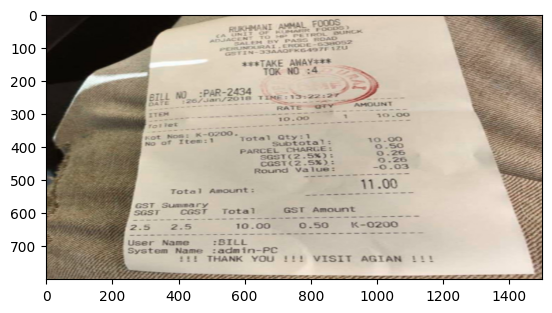

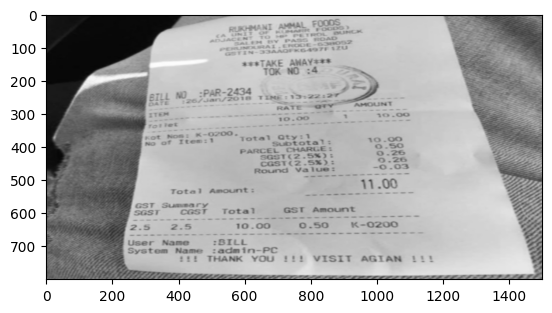

In [4]:
regen = cv2.cvtColor(blurred , cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()


In [5]:
regen.shape

(800, 1500, 3)

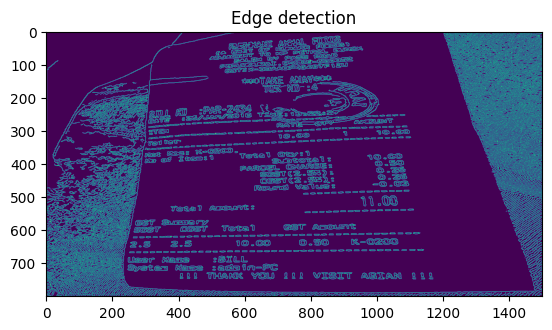

In [6]:
## Edge Detection 

edge = cv2.Canny(blurred , 0 , 50)
orig_edge = edge.copy()

plt.title("Edge detection")
plt.imshow(orig_edge)
plt.show()

In [7]:
## Countoirs Extraction

contours, _ = cv2.findContours(edge , cv2.RETR_LIST , cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours , reverse = True, key = cv2.contourArea)

3461


In [8]:
# select the best contours Region/ Boundaries

for c in contours:
    
    p = cv2.arcLength(c, True) 
    approx = cv2.approxPolyDP(c, 0.01*p, True)
     
    if len(approx) == 4:
        target = approx
        break
        
print(target.shape)


(4, 1, 2)


In [9]:
## reorder target Contor
#h -> contours
def reorder(h):
    
    h= h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype = np.float32 )
    
    add = h.sum(axis = 1)
    hnew[3] = h[np.argmax(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis = 1)
    hnew[3] = h[np.argmax(diff)]
    hnew[1] = h[np.argmax(diff)]
    
    
    return hnew

In [10]:
reorder = reorder(target)
print("***||***")
print(reorder)

[[1432   16]
 [1375   37]
 [1370   36]
 [1428   15]]
***||***
[[   0.    0.]
 [1370.   36.]
 [   0.    0.]
 [1370.   36.]]


In [11]:
## project toa fixed screen
input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])


In [12]:
M = cv2.getPerspectiveTransform(input_representation , output_map)

ans = cv2.warpPerspective(orig , M , (800,800))

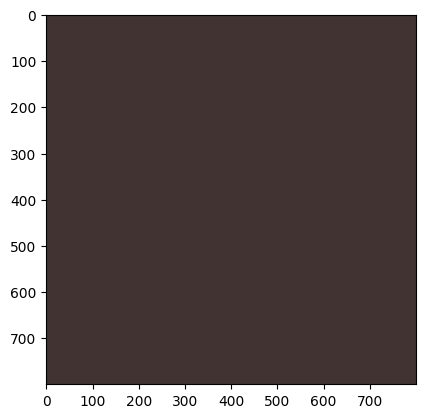

In [13]:
plt.imshow(ans)
plt.show()

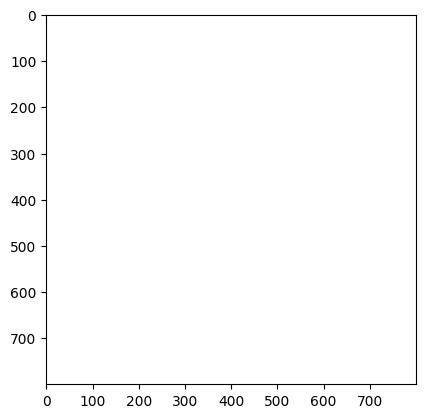

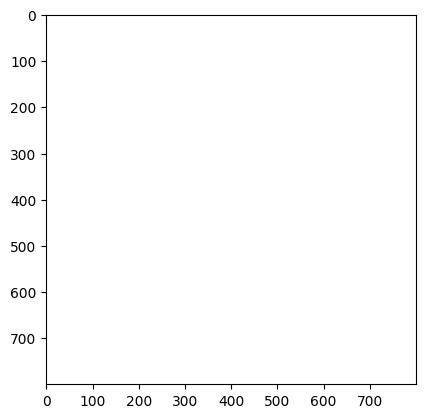

In [14]:
res = cv2.cvtColor(ans , cv2.COLOR_BGR2GRAY)

blur_res = cv2.GaussianBlur(res , (3,3), 0)

plt.imshow(res , cmap = "binary")
plt.show()
plt.imshow(blur_res , cmap = "binary")
plt.show()